In [5]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [6]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)


There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [7]:
train_dir=image_path/"train"
test_dir=image_path/"test"

In [8]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

Random;y selecting imaegs from random *paths*

Image class: steak
Image size: (512, 512)
random_image : data/pizza_steak_sushi/train/steak/1382427.jpg


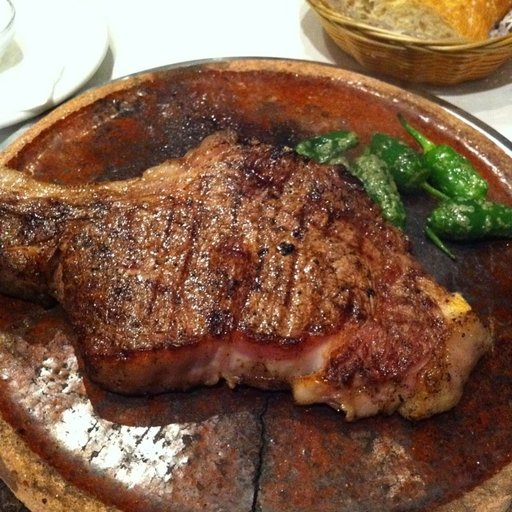

In [15]:
import random
from PIL import Image

random.seed(42)
image_path_list=list(image_path.glob("*/*/*.jpg"))
random_image=random.choice(image_path_list)
image_class=random_image.parent.stem
img=Image.open(random_image)
print(f"Image class: {image_class}")
print(f"Image size: {img.size}")
print(f"random_image : {random_image}")
img

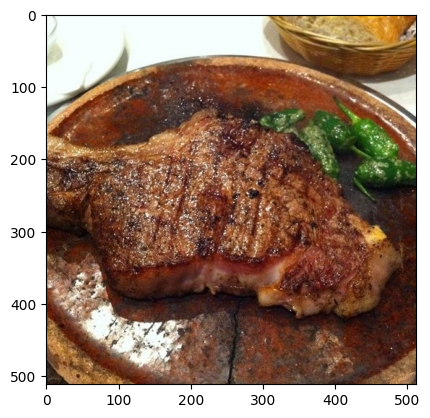

In [18]:
import numpy as np
import matplotlib.pyplot as plt
img_array=np.asarray(img)
plt.imshow(img_array)

array([[[245, 255, 255],
        [245, 255, 255],
        [246, 255, 255],
        ...,
        [154,  94,  31],
        [159,  99,  37],
        [152,  93,  33]],

       [[247, 255, 255],
        [245, 255, 255],
        [245, 255, 254],
        ...,
        [176, 114,  53],
        [176, 116,  56],
        [157,  98,  40]],

       [[248, 255, 255],
        [245, 255, 255],
        [246, 255, 255],
        ...,
        [181, 119,  62],
        [179, 118,  63],
        [155,  94,  40]],

       ...,

       [[ 59,  46,  40],
        [ 40,  27,  21],
        [ 43,  28,  21],
        ...,
        [101,  78,  60],
        [ 83,  60,  44],
        [ 99,  76,  60]],

       [[ 72,  57,  52],
        [ 59,  44,  39],
        [ 46,  31,  24],
        ...,
        [ 94,  68,  51],
        [ 89,  63,  48],
        [111,  85,  70]],

       [[ 73,  58,  53],
        [ 69,  54,  49],
        [ 42,  27,  20],
        ...,
        [ 76,  51,  31],
        [ 94,  68,  53],
        [101,  75,  60]]], dtype=uint8)
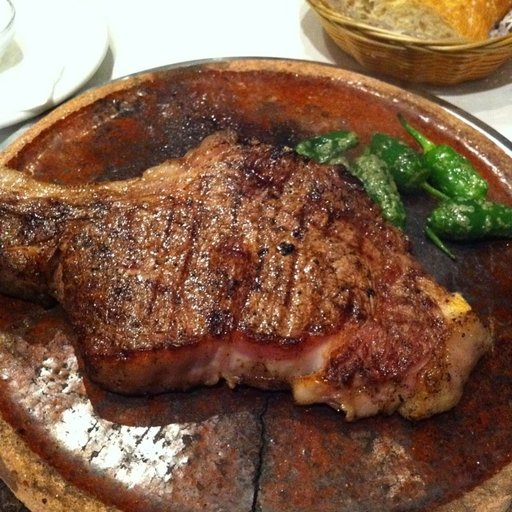

In [19]:
img_array

Transforming Data \

In [20]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data transformer same as image data genereator in  in Tensor Flwo

In [22]:
data_transform=transforms.Compose([transforms.Resize(size=(64,64)),
                                   transforms.RandomHorizontalFlip(p=.5),
                                   transforms.ToTensor()

                                   ])

In [26]:
data_transform(img).shape

torch.Size([3, 64, 64])

Transforming an Augmenting IMage s


In [30]:
def plot_transformed(image_path,transform,n=3,seed=42):
  random.seed(seed)
  random_image_path=random.sample(image_path,k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig,ax=plt.subplots(1,2)
      ax[0].imshow(f)

      transformed_image=transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      plt.axis("off")
      plt.show()






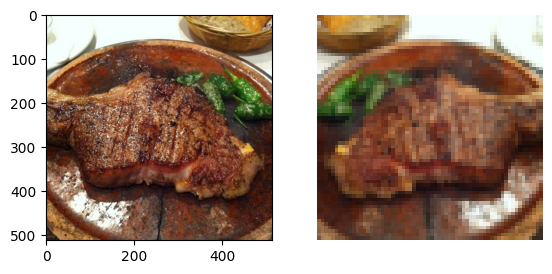

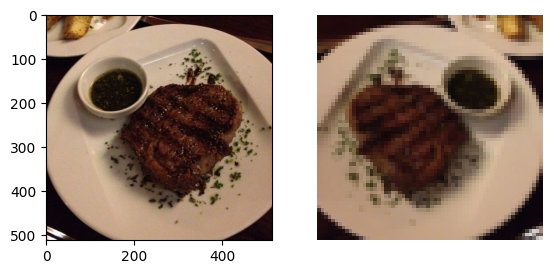

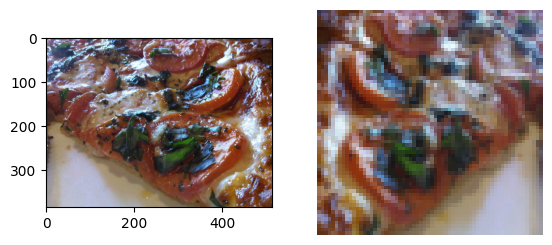

In [31]:
plot_transformed(image_path_list,data_transform,n=3)

Image_folder

In [32]:
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,transform=data_transform)
test_data=datasets.ImageFolder(root=test_dir,transform=data_transform)

In [33]:
train_data.classes

['pizza', 'steak', 'sushi']

In [36]:
img, label=train_data[0][0] , train_data[0][1]
img
label

0

In [38]:
from torch.utils.data import DataLoader
train_dataloader=DataLoader(train_data,batch_size=1,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=1,shuffle=True)

In [39]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b26108a9c60>,
 <torch.utils.data.dataloader.DataLoader at 0x7b26108ab310>)

creating your own dataset

In [41]:
import os
import pathlib
from  torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List

In [42]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [43]:
target_directory=train_dir
classes_names=sorted([entry.name for entry in list(os.scandir(target_directory))])

In [44]:
classes_names

['pizza', 'steak', 'sushi']

In [47]:
def find_classes(directory):
  classes=sorted([entry.name for entry in list(os.scandir(directory)) if entry.is_dir() ])
  class_to_idx={classes:i for i,classes in enumerate(classes)}
  return classes , class_to_idx

In [48]:
from torchvision import datasets
train_transform=transforms.Compose([transforms.Resize(size=(224,224)),
                                   transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                   transforms.ToTensor()

                                   ])

In [49]:
test_transform=transforms.Compose([transforms.Resize(size=(224,224)),
                                   transforms.ToTensor()

                                   ])

In [50]:
simple_transform=transforms.Compose([transforms.Resize(size=(64,64)),
                                   transforms.ToTensor()

                                   ])

In [53]:
from torchvision import datasets
train_data_simple=datasets.ImageFolder(root=train_dir,transform=simple_transform)
test_data_simple=datasets.ImageFolder(root=test_dir,transform=simple_transform)

In [55]:
from torch.utils.data import DataLoader

In [57]:
train_data_simple=DataLoader(train_data_simple,batch_size=1,shuffle=True)
test_data_simple=DataLoader(test_data_simple,batch_size=1,shuffle=True)

In [59]:
from torch import nn

In [61]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to("cpu")
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [71]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device


        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [72]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device


            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [73]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [75]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to("cpu")

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_data_simple,
                        test_dataloader=test_data_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=25)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1183 | train_acc: 0.2978 | test_loss: 1.0970 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.1056 | train_acc: 0.2889 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0993 | train_acc: 0.3111 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0998 | train_acc: 0.3244 | test_loss: 1.1004 | test_acc: 0.2533
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.3244 | test_loss: 1.1005 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0989 | train_acc: 0.2889 | test_loss: 1.1013 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0985 | train_acc: 0.3467 | test_loss: 1.0985 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0995 | train_acc: 0.3467 | test_loss: 1.1016 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0991 | train_acc: 0.3200 | test_loss: 1.1014 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0985 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333
Epoch: 12 | train_l